In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd,np,plt,sns

(<module 'pandas' from 'C:\\Users\\amr20\\anaconda3\\lib\\site-packages\\pandas\\__init__.py'>,
 <module 'numpy' from 'C:\\Users\\amr20\\anaconda3\\lib\\site-packages\\numpy\\__init__.py'>,
 <module 'matplotlib.pyplot' from 'C:\\Users\\amr20\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>,
 <module 'seaborn' from 'C:\\Users\\amr20\\anaconda3\\lib\\site-packages\\seaborn\\__init__.py'>)

In [13]:
points = [(3, 4), (2.5, 4), (1.5, 2.5), (3, 5), (2.8, 4.5), (2.5, 4.5), (1.2, 2.5), (1, 3), (1, 5)]
points = [list(point) for point in points]
points

[[3, 4],
 [2.5, 4],
 [1.5, 2.5],
 [3, 5],
 [2.8, 4.5],
 [2.5, 4.5],
 [1.2, 2.5],
 [1, 3],
 [1, 5]]

In [14]:
import math
def euclidean_distance(point, other_points):
    distances = []
    for other_point in other_points:
        distance = math.sqrt(sum([(point[i]-other_point[i])**2 for i in range(len(point))]))
        distances.append(distance)
    return distances
point = [3, 4]
euclidean_distance(point, points)

[0.0,
 0.5,
 2.1213203435596424,
 1.0,
 0.5385164807134505,
 0.7071067811865476,
 2.3430749027719964,
 2.23606797749979,
 2.23606797749979]

In [31]:
for i in points:
    print(f'p: {euclidean_distance(i, points)}\n')

p: [0.0, 0.5, 2.1213203435596424, 1.0, 0.5385164807134505, 0.7071067811865476, 2.3430749027719964, 2.23606797749979, 2.23606797749979]

p: [0.5, 0.0, 1.8027756377319946, 1.118033988749895, 0.58309518948453, 0.5, 1.9849433241279208, 1.8027756377319946, 1.8027756377319946]

p: [2.1213203435596424, 1.8027756377319946, 0.0, 2.9154759474226504, 2.3853720883753127, 2.23606797749979, 0.30000000000000004, 0.7071067811865476, 2.5495097567963922]

p: [1.0, 1.118033988749895, 2.9154759474226504, 0.0, 0.5385164807134505, 0.7071067811865476, 3.0805843601498726, 2.8284271247461903, 2.0]

p: [0.5385164807134505, 0.58309518948453, 2.3853720883753127, 0.5385164807134505, 0.0, 0.2999999999999998, 2.5612496949731396, 2.3430749027719964, 1.8681541692269403]

p: [0.7071067811865476, 0.5, 2.23606797749979, 0.7071067811865476, 0.2999999999999998, 0.0, 2.3853720883753127, 2.1213203435596424, 1.5811388300841898]

p: [2.3430749027719964, 1.9849433241279208, 0.30000000000000004, 3.0805843601498726, 2.56124969497

In [32]:
dataset = pd.read_csv('data/Mall_Customers.csv')

In [34]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset.Genre = le.fit_transform(dataset.Genre)

In [36]:
X = dataset.iloc[:, [3,4]].values

In [37]:
X.shape

(200, 2)

## DBSCAN

In [38]:
# Min Point
mpt = 4

In [66]:
# Epison
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=mpt-1)
kn = neighbors.fit(X)

In [67]:
distances, index = kn.kneighbors(X)

In [68]:
distances

array([[ 0.        ,  2.23606798,  7.21110255],
       [ 0.        ,  4.12310563,  5.38516481],
       [ 0.        ,  2.        ,  4.24264069],
       [ 0.        ,  1.41421356,  4.        ],
       [ 0.        ,  2.23606798,  6.40312424],
       [ 0.        ,  1.41421356,  3.16227766],
       [ 0.        ,  2.        ,  3.16227766],
       [ 0.        ,  5.09901951,  6.40312424],
       [ 0.        ,  3.16227766,  4.24264069],
       [ 0.        ,  4.47213595,  5.09901951],
       [ 0.        ,  1.41421356,  1.41421356],
       [ 0.        ,  4.12310563,  5.09901951],
       [ 0.        ,  1.41421356,  2.        ],
       [ 0.        ,  2.        ,  3.16227766],
       [ 0.        ,  1.41421356,  2.        ],
       [ 0.        ,  2.        ,  4.24264069],
       [ 0.        ,  3.        ,  6.32455532],
       [ 0.        ,  6.32455532,  7.61577311],
       [ 0.        ,  5.83095189,  6.08276253],
       [ 0.        ,  4.12310563,  6.40312424],
       [ 0.        ,  3.        ,  5.   

In [69]:
distances = np.mean(distances,axis=1)
distances

array([ 3.14905684,  3.16942348,  2.08088023,  1.80473785,  2.87973074,
        1.52549707,  1.72075922,  3.83404792,  2.46830612,  3.19038516,
        0.94280904,  3.07404171,  1.13807119,  1.72075922,  1.13807119,
        2.08088023,  3.10818511,  4.64677614,  3.97123814,  3.50874329,
        2.66666667,  2.0330065 ,  3.80785828,  2.        ,  3.90273464,
        3.39934634,  2.13807119,  6.53410842,  2.57958963,  3.83404792,
        2.69967317,  3.        ,  3.68741925,  3.80104141,  2.72075922,
        4.10337402,  3.29016053,  2.53518376,  3.96127075,  3.60555128,
        2.82842712,  5.09854338,  2.49899203,  2.38742589,  3.29983165,
        3.27698396,  2.25594298,  2.57621897,  1.05409255,  1.05409255,
        1.68816503,  1.38742589,  1.79944855,  1.70770188,  1.52549707,
        2.10818511,  1.68816503,  1.13807119,  1.13807119,  1.41202266,
        1.38742589,  1.33333333,  0.94280904,  0.66666667,  0.80473785,
        0.33333333,  1.        ,  1.        ,  0.33333333,  1.07

In [72]:
distances = sorted(distances)

In [71]:
distances

array([ 0.33333333,  0.33333333,  0.66666667,  0.66666667,  0.66666667,
        0.66666667,  0.66666667,  0.66666667,  0.66666667,  0.66666667,
        0.66666667,  0.74535599,  0.74535599,  0.80473785,  0.80473785,
        0.80473785,  0.80473785,  0.80473785,  0.80473785,  0.80473785,
        0.94280904,  0.94280904,  0.94280904,  0.94280904,  0.94280904,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.05409255,  1.05409255,  1.07868933,
        1.07868933,  1.07868933,  1.07868933,  1.07868933,  1.13807119,
        1.13807119,  1.13807119,  1.13807119,  1.13807119,  1.13807119,
        1.13807119,  1.21676051,  1.21676051,  1.21676051,  1.27614237,
        1.33333333,  1.33333333,  1.33333333,  1.33333333,  1.33333333,
        1.33333333,  1.33333333,  1.33333333,  1.33333333,  1.38742589,
        1.38742589,  1.41202266,  1.41202266,  1.41202266,  1.41

Text(0, 0.5, 'EPS')

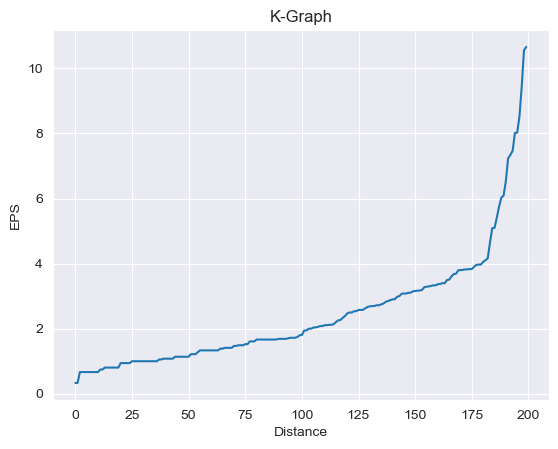

In [73]:
plt.plot(distances)
plt.title('K-Graph')
plt.xlabel('Distance')
plt.ylabel('EPS')

In [152]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=10, min_samples=7,n_jobs=-1,metric='euclidean')
dbscan.fit(X)

DBSCAN(eps=10, min_samples=7, n_jobs=-1)

In [153]:
y_pred = dbscan.labels_

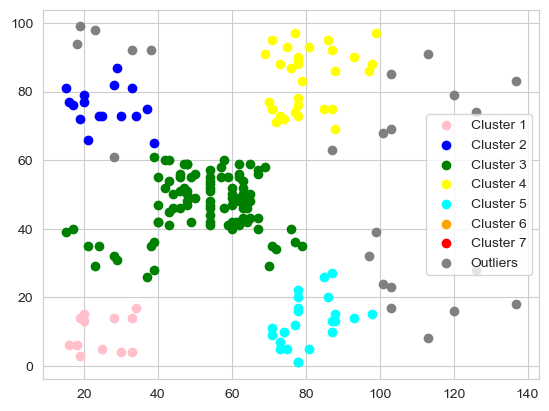

In [154]:
plt.scatter(X[y_pred==0, 0], X[y_pred==0,1],color='pink',label='Cluster 1')
plt.scatter(X[y_pred==1, 0], X[y_pred==1,1],color='blue',label='Cluster 2')
plt.scatter(X[y_pred==2, 0], X[y_pred==2,1],color='green',label='Cluster 3')
plt.scatter(X[y_pred==3, 0], X[y_pred==3,1],color='yellow',label='Cluster 4')
plt.scatter(X[y_pred==4, 0], X[y_pred==4,1],color='cyan',label='Cluster 5')
plt.scatter(X[y_pred==5, 0], X[y_pred==5,1],color='orange',label='Cluster 6')
plt.scatter(X[y_pred==6, 0], X[y_pred==6,1],color='red',label='Cluster 7')
plt.scatter(X[y_pred==-1, 0], X[y_pred==-1,1],color='grey',label='Outliers')
plt.legend()
plt.show()

In [155]:
from sklearn.metrics import silhouette_score
print(silhouette_score(X, y_pred))

0.42084049577844984
